In [2]:
import numpy as np
from numpy import cos, sin, exp, pi, tan, sqrt
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

t1 = -np.array([
 [0.00885997 - 0.0151357 *1j, -0.0761286 + 0.0309107 *1j, -0.0025 - 
   0.00756786 *1j, 0.0811286 - 0.015775 *1j, -0.01386],
 [-0.0761286 + 0.0309107 *1j, -0.120513 - 0.0466857 *1j, 
  0.0025 + 0.0233429 *1j, 0.115513, 0.0811286 + 0.015775 *1j],
 [-0.0025 - 0.00756786 *1j, 0.0025 + 0.0233429 *1j, -0.0025, 
  0.0025 - 0.0233429 *1j, -0.0025 + 0.00756786 *1j],
 [0.0811286 - 0.015775 *1j, 0.115513, 
  0.0025 - 0.0233429 *1j, -0.120513 + 0.0466857 *1j, -0.0761286 - 
   0.0309107 *1j],
 [-0.01386, 
  0.0811286 + 0.015775 *1j, -0.0025 + 0.00756786 *1j, -0.0761286 - 
   0.0309107 *1j, 0.00885997 + 0.0151357*1j]])
 

t3 = -np.array([
 [-0.0025, -0.0883399, -0.172664, -0.0883399, -0.0025],
 [0.0833399, -0.0025, 0.0375061, -0.0025, 0.0833399],
 [0.167664, -0.0425061, -0.0025, -0.0425061, 0.167664],
 [0.0833399, -0.0025, 0.0375061, -0.0025, 0.0833399],
 [-0.0025, -0.0883399, -0.172664, -0.0883399, -0.0025]
])

t4 = -np.array([
 [0. + 0.0277532 *1j, 0. + 0.227548 *1j, 0. + 0.491746 *1j, 0. + 0.227548 *1j,
   0. + 0.0277532 *1j],
 [0. + 0.0635846 *1j, 0. + 0.114151 *1j, 0. - 0.280982 *1j, 0. + 0.114151 *1j,
   0. + 0.0635846 *1j],
 [0, 0, 0, 0, 0],
 [0. - 0.0635846 *1j, 0. - 0.114151 *1j, 0. + 0.280982 *1j, 0. - 0.114151 *1j,
   0. - 0.0635846 *1j],
 [0. - 0.0277532 *1j, 0. - 0.227548 *1j, 0. - 0.491746 *1j, 0. - 0.227548 *1j,
   0. - 0.0277532 *1j]
        ])

t6 = -np.array([
 [0. + 0.0277532 *1j, 0. + 0.0635846 *1j, 0, 0. - 0.0635846 *1j, 
  0. - 0.0277532 *1j],
 [0. + 0.227548 *1j, 0. + 0.114151 *1j, 0, 0. - 0.114151 *1j, 
  0. - 0.227548 *1j],
 [0. + 0.491746 *1j, 0. - 0.280982 *1j, 0, 0. + 0.280982*1j, 
  0. - 0.491746 *1j],
 [0. + 0.227548 *1j, 0. + 0.114151 *1j, 0, 0. - 0.114151*1j, 
  0. - 0.227548 *1j],
 [0. + 0.0277532 *1j, 0. + 0.0635846*1j, 0, 0. - 0.0635846 *1j, 
  0. - 0.0277532 *1j]
        ])

t8 = -np.array([
 [0, -0.187857, -0.433013, -0.187857, 0],
 [-0.187857, 0, 0.30825, 0, -0.187857],
 [-0.433013, 0.30825, 0, 0.30825, -0.433013],
 [-0.187857, 0, 0.30825, 0, -0.187857],
 [0, -0.187857, -0.433013, -0.187857, 0]
        ])

#Gell-Mann Matrices
GM0 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
GM1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
GM2 = np.array([[0, -1j, 0], [1j, 0, 0], [0, 0, 0]])
GM3 = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 0]])
GM4 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
GM5 = np.array([[0, 0, -1j], [0, 0, 0], [1j, 0, 0]])
GM6 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0]])
GM7 = np.array([[0, 0, 0], [0, 0, -1j], [0, 1j, 0]])
GM8 = (1/sqrt(3))*np.array([[1, 0, 0], [0, 1, 0], [0, 0, -2]])
 
Nx = 2;
Ny = 2;
lx = np.linspace(-Nx, Nx, 2*Nx+1)
ly = np.linspace(-Ny, Ny, 2*Nx+1)
Nnx = 2*Nx + 1
Nny = 2*Ny + 1

def h1N(kx, ky):
    return np.sum([exp(1j*pi*(kx*lx[i] + ky*ly[j]))*t1[i,j] for i in range(Nnx) for j in range(Nny)])
def h3N(kx, ky):
    return np.sum([exp(1j*pi*(kx*lx[i] + ky*ly[j]))*t3[i,j] for i in range(Nnx) for j in range(Nny)])
def h4N(kx, ky):
    return np.sum([exp(1j*pi*(kx*lx[i] + ky*ly[j]))*t4[i,j] for i in range(Nnx) for j in range(Nny)])
def h6N(kx, ky):
    return np.sum([exp(1j*pi*(kx*lx[i] + ky*ly[j]))*t6[i,j] for i in range(Nnx) for j in range(Nny)])
def h8N(kx, ky):
    return np.sum([exp(1j*pi*(kx*lx[i] + ky*ly[j]))*t8[i,j] for i in range(Nnx) for j in range(Nny)])


def Euler2Hamiltonian(k):
    kx = k[0]
    ky = k[1]
    hjk = np.array([0, h1N(kx,ky), h3N(kx,ky), h4N(kx,ky), h6N(kx,ky), h8N(kx,ky)])
    gellManns = np.array([GM0, GM1, GM3, GM4, GM6, GM8])
    HFn = np.array([hjk[i]*gellManns[i] for i in range(len(hjk))])
    return np.sum(HFn, axis=0)

In [ ]:
def F_Euler(t, psi, gammaPoint, Fvec):
    k = gammaPoint+ Fvec*t
    H = Euler2Hamiltonian(k)
    return -1j*np.dot(H, psi)

gammaPoint = np.array([0,0.5])
H0 = Euler2Hamiltonian(gammaPoint)
_, evecs0 = np.linalg.eigh(H0)
u0 = evecs0[:,0]

In [17]:
# Large Force

In [18]:
F = 100
Fvec = F*np.array([1,0]) 
sol = solve_ivp(lambda t, psi : F_Euler(t, psi, gammaPoint, Fvec), 
        t_span=(0,2/F), y0=u0, rtol=1e-11, 
        atol=1e-11,
        method='RK45')

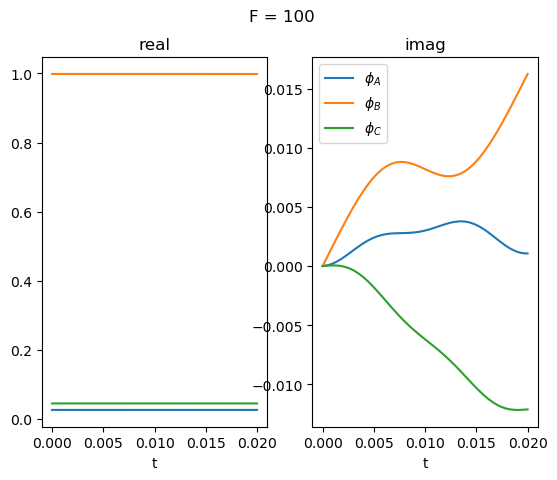

In [19]:
fig, ax = plt.subplots(ncols=2, nrows=1)
funcs = [np.real, np.imag]
for i, func in enumerate(funcs):
    ax[i].plot(sol.t, func(sol.y[0,:]), label=r"$\phi_A$")
    ax[i].plot(sol.t, func(sol.y[1,:]), label=r"$\phi_B$")
    ax[i].plot(sol.t, func(sol.y[2,:]), label=r"$\phi_C$")
    ax[i].set_xlabel("t")
ax[0].set_title("real")
ax[1].set_title("imag")
plt.legend()
plt.suptitle("F = 100")
plt.show()

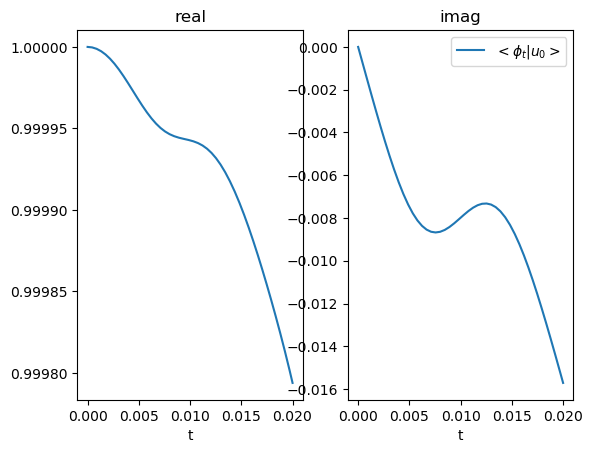

In [13]:
overlap = np.array([np.vdot(sol.y[:,i], u0) for i in range(np.shape(sol.y)[1])])
fig, ax = plt.subplots(ncols=2, nrows=1)
funcs = [np.real, np.imag]
for i, func in enumerate(funcs):
    ax[i].plot(sol.t, func(overlap), label=r"$<\phi_t | u_0>$")
    ax[i].set_xlabel("t")
ax[0].set_title("real")
ax[1].set_title("imag")
plt.legend()
plt.show()

In [20]:
#Small Force

In [21]:
F = 0.1
Fvec = F*np.array([1,0]) 
sol = solve_ivp(lambda t, psi : F_Euler(t, psi, gammaPoint, Fvec), 
        t_span=(0,2/F), y0=u0, rtol=1e-11, 
        atol=1e-11,
        method='RK45')

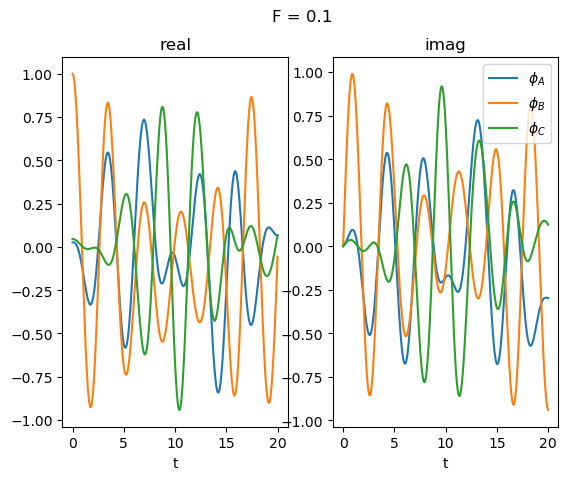

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=1)
funcs = [np.real, np.imag]
for i, func in enumerate(funcs):
    ax[i].plot(sol.t, func(sol.y[0,:]), label=r"$\phi_A$")
    ax[i].plot(sol.t, func(sol.y[1,:]), label=r"$\phi_B$")
    ax[i].plot(sol.t, func(sol.y[2,:]), label=r"$\phi_C$")
    ax[i].set_xlabel("t")
ax[0].set_title("real")
ax[1].set_title("imag")
plt.suptitle("F = 0.1")
plt.legend()
plt.show()

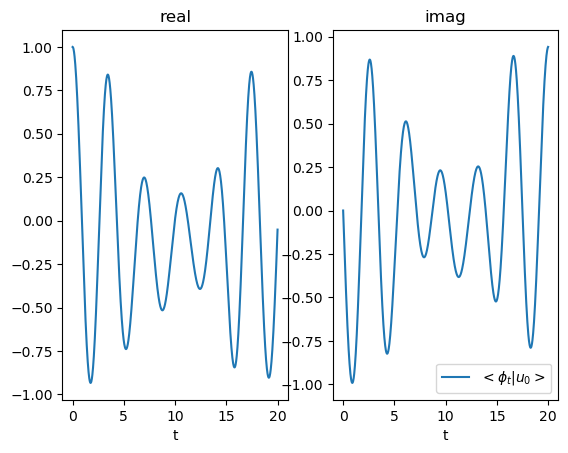

In [16]:
overlap = np.array([np.vdot(sol.y[:,i], u0) for i in range(np.shape(sol.y)[1])])
fig, ax = plt.subplots(ncols=2, nrows=1)
funcs = [np.real, np.imag]
for i, func in enumerate(funcs):
    ax[i].plot(sol.t, func(overlap), label=r"$<\phi_t | u_0>$")
    ax[i].set_xlabel("t")
ax[0].set_title("real")
ax[1].set_title("imag")
plt.legend()
plt.show()